In [ ]:
import time
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset =  pd.read_csv('/content/enrollment_load.csv', header=None)

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
number_of_timeslot =int(dataset[0][0])
print(number_of_timeslot)

20


In [ ]:
number_of_rooms = dataset[1][0]
print(number_of_rooms)

 10


In [ ]:
number_of_courses = dataset[1].nunique()-1
print(number_of_courses)

33


In [ ]:
code_of_courses = dataset[1].unique()
code_of_courses = code_of_courses[1:]
print(code_of_courses)

['IS184203' 'IS184620' 'IS184948' 'IS184411' 'IS184622' 'IS184728'
 'IS184727' 'IS184934' 'IS184516' 'IS184101' 'IS184308' 'IS184621'
 'IS184946' 'IS184624' 'IS184940' 'IS184939' 'IS184413' 'IS184937'
 'IS184944' 'IS184204' 'IS184943' 'IS184931' 'IS184623' 'IS184412'
 'IS184309' 'IS184625' 'IS184414' 'IS184947' 'IS184942' 'IS184305'
 'IS184933' 'IS184930' 'IS184932']


In [ ]:
number_of_student=dataset[0].nunique()
number_of_student

630

In [ ]:
conflict_matrix = pd.DataFrame(np.zeros(shape=(number_of_courses,number_of_courses)),dtype = int)

In [ ]:
conflict_matrix

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
index_1 = 0;
index_2 = 0;
for course_1 in code_of_courses:
  number_of_student_within_course_1 = list(dataset[dataset[1] == course_1][0])
  index_2=0
  for course_2 in code_of_courses:
    number_of_student_within_course_2 = list(dataset[dataset[1] == course_2][0])
    conflict_matrix.at[index_1,index_2] = len(set(number_of_student_within_course_1)&set(number_of_student_within_course_2))
    index_2+=1
  index_1+=1

In [ ]:
conflict_matrix

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,161,0,0,9,0,0,0,0,0,12,...,7,38,0,9,0,0,19,0,0,0
1,0,109,0,1,78,37,13,3,4,0,...,4,0,101,4,6,11,1,7,13,0
2,0,0,40,0,0,0,0,0,0,0,...,0,0,2,1,15,5,0,0,1,0
3,9,1,0,142,56,0,0,0,32,2,...,136,3,1,137,0,0,24,0,0,0
4,0,78,0,56,150,36,15,3,13,0,...,59,0,94,56,5,7,2,5,8,0
5,0,37,0,0,36,49,8,2,0,0,...,2,0,45,3,1,2,0,5,9,0
6,0,13,0,0,15,8,19,0,1,0,...,0,0,17,0,1,0,0,0,1,0
7,0,3,0,0,3,2,0,8,0,0,...,0,0,6,0,0,1,0,2,0,0
8,0,4,0,32,13,0,1,0,40,0,...,34,0,5,32,0,0,1,0,0,0
9,12,0,0,2,0,0,0,0,0,13,...,2,0,0,2,0,0,1,0,0,0


In [ ]:
conflict_matrix_array = conflict_matrix.to_numpy()
print(conflict_matrix_array)

[[161   0   0 ...   0   0   0]
 [  0 109   0 ...   7  13   0]
 [  0   0  40 ...   0   1   0]
 ...
 [  0   7   0 ...  47   7   0]
 [  0  13   1 ...   7  31   0]
 [  0   0   0 ...   0   0  28]]


In [ ]:
# timeslot_assignment = []
# for i in range(0,number_of_courses):
#   timeslot_assignment[i] = 0

timeslot_assignment = [0 for i in range(number_of_courses)]
print(len(timeslot_assignment))
print(timeslot_assignment)

33
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def is_available_slot(courseid, timeslot):
  if timeslot not in timeslot_assignment:
    return True
  elif timeslot in timeslot_assignment:
    course_slot = [idx for idx, course in enumerate(timeslot_assignment) if course == timeslot]
    ls = []
    for adjacent_course in course_slot:
      ls.append(conflict_matrix_array[courseid][adjacent_course])
    if any(ls) > 0:
      return False
    else:
      return True

In [ ]:
for courses_index in range(0, number_of_courses):
  for timeslot in range(1,number_of_timeslot+1):
    if is_available_slot(courses_index, timeslot):
      timeslot_assignment[courses_index] = timeslot
      break

In [ ]:
def is_feasible(solution):
  length_of_timeslot = len(solution)
  score = 0
  for i in range(length_of_timeslot - 1):
    for j in range(length_of_timeslot - 1):
      j+=i+1
      if(j > length_of_timeslot-1):
        break
      if conflict_matrix_array[i][j] != 0 and solution[i]== solution[j]:
        return False
  return True


In [ ]:
def objective_function(solution):
  length_of_timeslot = len(solution)
  score = 0
  for i in range(length_of_timeslot - 1):
    for j in range(length_of_timeslot - 1):
      j+=i+1
      if(j > length_of_timeslot-1):
        break
      if (solution[j] - solution[i]>=3):
        score += 0
      else:
        score += 2**(solution[j]-solution[i]) * conflict_matrix_array[j][i]
  return score/number_of_student

In [ ]:
timeslot_assignment

[1,
 1,
 1,
 2,
 3,
 2,
 4,
 4,
 5,
 3,
 3,
 6,
 5,
 7,
 1,
 8,
 9,
 10,
 6,
 4,
 8,
 9,
 11,
 4,
 5,
 12,
 13,
 13,
 10,
 10,
 14,
 15,
 1]

In [ ]:
is_feasible(timeslot_assignment)

True

In [ ]:
of = objective_function(timeslot_assignment)
print(of)

4.410739087301588


In [ ]:
import random
def create_new_solution_1(solution):
  loop = False
  while not loop:
    random_course = random.randint(0, number_of_courses-1)
    old_timeslot = solution[random_course]
    random_timeslot = random.randint(1, number_of_timeslot)
    solution[random_course] = random_timeslot
    loop = is_feasible(solution)
    if not loop:
      solution[random_course] = old_timeslot
  return solution.copy()

In [ ]:
def create_new_solution_2(solution):
  loop = False
  while not loop:
    random_course_1 = random.randint(0, number_of_courses-1)
    random_course_2 = random.randint(0, number_of_courses-1)
    timeslot_course_1 = solution[random_course_1]
    timeslot_course_2 = solution[random_course_2]
    solution[random_course_1] = timeslot_course_2
    solution[random_course_2] = timeslot_course_1
    loop = is_feasible(solution)
    if not loop:
      solution[random_course_1] = int(timeslot_course_1)
      solution[random_course_2] = int(timeslot_course_2)
  return solution.copy()

In [ ]:
num_of_iteration = 1000
print('initial:',timeslot_assignment)
for i in range(num_of_iteration):
  if random.random() < 0.5:
      new_timeslot_assignment = create_new_solution_1(timeslot_assignment.copy())
  else:
      new_timeslot_assignment = create_new_solution_2(timeslot_assignment.copy())
  if objective_function(new_timeslot_assignment) < objective_function(timeslot_assignment):
    timeslot_assignment = new_timeslot_assignment.copy()

initial: [1, 1, 1, 2, 3, 2, 4, 4, 5, 3, 3, 6, 5, 7, 1, 8, 9, 10, 6, 4, 8, 9, 11, 4, 5, 12, 13, 13, 10, 10, 14, 15, 1]


In [ ]:
# timeslot_assignment = [10, 12, 1, 6, 3, 16, 10, 11, 14, 4, 20, 20, 4, 15, 1, 7, 18, 10, 20, 13, 9, 7, 1, 9, 3, 19, 13, 18, 10, 2, 2, 8, 1]

In [ ]:
print('new:',timeslot_assignment)

new: [10, 12, 1, 6, 3, 16, 10, 11, 14, 4, 20, 20, 4, 15, 1, 7, 18, 10, 20, 13, 9, 7, 1, 9, 3, 19, 13, 18, 10, 2, 2, 8, 1]


In [ ]:
print(objective_function(timeslot_assignment))

0.38007760426354786


In [ ]:
initial_temperature = 100000
cooling = 0.909  # cooling coefficient
number_variables = 33
upper_bounds = [20 for i in range(33)]
lower_bounds = [1 for i in range(33)]
computing_time = 600 # second(s)

In [ ]:
# Simulated Annealing Algorithm:
initial_solution=timeslot_assignment
for v in range(number_variables):
    initial_solution[v] = random.uniform(lower_bounds[v],upper_bounds[v])

current_solution = initial_solution
best_solution = initial_solution
n = 1  # no of solutions accepted
best_fitness = objective_function(best_solution)
current_temperature = initial_temperature # current temperature
start = time.time()
no_attempts = 100 # number of attempts in each level of temperature
record_best_fitness =[]

Streaming output truncated to the last 5000 lines.
0.0
iteration: 6142, best_solution: [11, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2, 12, 9, 17, 17, 6, 13, 4, 2, 18], best_fitness: 0.7589473694089859
solution 2: [14, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2, 12, 9, 17, 17, 6, 13, 4, 2, 18]
0.0
iteration: 6143, best_solution: [14, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2, 12, 9, 17, 17, 6, 13, 4, 2, 18], best_fitness: 0.7589473694089859
random: 0.23461020695939172
solution 1: [14, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2, 12, 3, 17, 17, 6, 13, 4, 2, 18]
0.0
iteration: 6144, best_solution: [14, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2, 12, 3, 17, 17, 6, 13, 4, 2, 18], best_fitness: 0.7589473694089859
solution 2: [14, 7, 11, 5, 11, 12, 18, 10, 12, 8, 3, 15, 18, 19, 5, 16, 8, 6, 14, 1, 6, 8, 20, 2,

<ipython-input-31-f892463a4d69>:25: RuntimeWarning: overflow encountered in double_scalars
  p = math.exp(-E/(EA*current_temperature))


Streaming output truncated to the last 5000 lines.
iteration: 132465, best_solution: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 18, 10, 6, 15, 19, 7, 13, 15, 19, 13, 19, 9, 16, 17, 2, 15, 14, 11, 12, 18, 17, 16], best_fitness: 0.6554010270133851
solution 2: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 18, 10, 6, 15, 19, 7, 13, 15, 19, 13, 19, 9, 16, 17, 2, 15, 14, 5, 12, 18, 17, 16]
0.0
iteration: 132466, best_solution: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 18, 10, 6, 15, 19, 7, 13, 15, 19, 13, 19, 9, 16, 17, 2, 15, 14, 5, 12, 18, 17, 16], best_fitness: 0.6554010270133851
solution 2: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 18, 10, 6, 15, 19, 7, 13, 15, 19, 13, 19, 9, 16, 17, 2, 15, 14, 5, 12, 18, 17, 16]
0.0
iteration: 132467, best_solution: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 18, 10, 6, 15, 19, 7, 13, 15, 19, 13, 19, 9, 16, 17, 2, 15, 14, 5, 12, 18, 17, 16], best_fitness: 0.6554010270133851
random: 0.23577041070271354
solution 1: [2, 20, 13, 10, 1, 12, 4, 14, 17, 9, 4, 3, 10, 6, 15, 19,

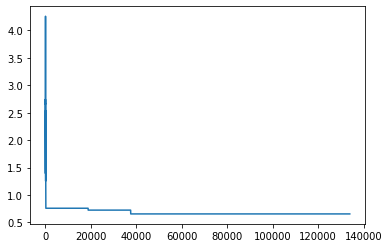

In [ ]:
for i in range(9999999999):
    # for j in range(no_attempts):
    #   # num_of_iteration = 1000
    #   for i in range(num_of_iteration):
        random_number = random.random()
        if random_number < 0.5:
          print("random:", random_number)
          new_timeslot_assignment = create_new_solution_1(best_solution)
          print("solution 1:", new_timeslot_assignment)
        else:
          new_timeslot_assignment = create_new_solution_1(best_solution)
          print("solution 2:", new_timeslot_assignment)
        current_solution = new_timeslot_assignment

        # timeslot_assignment = new_timeslot_assignment.copy()
        # for k in range(number_variables):
        #     current_solution[k] = best_solution[k] + (random.randint(lower_bounds[k],upper_bounds[k]))
        #     current_solution[k] = max(min(current_solution[k], upper_bounds[k]), lower_bounds[k])

        current_fitness = objective_function(current_solution)
        E = abs(current_fitness - best_fitness)
        if i == 0:
          EA = E
        if current_fitness > best_fitness:
          p = math.exp(-E/(EA*current_temperature))
           #make a decision to accept the worse solution or not
          print(p)
          if random.random() < p:
            accept = True # this worse solution is accepted
          else:
            accept = False # this worse solution is not accepted
        else:
          accept = True # accept better solution
        if accept == True:
          best_solution = current_solution #update the best solution
          best_fitness = objective_function(best_solution)
          n = n + 1 # count the solutions accepted
          EA = (EA * (n-1)+ E)/n #update EA

        print('iteration: {}, best_solution: {}, best_fitness: {}'.format(i, best_solution, best_fitness))
        record_best_fitness.append(best_fitness)
        #Cooling the temperature
        current_temperature = current_temperature*cooling
        #Stop computing by time
        end = time.time()
        if end-start >= computing_time:
          break
plt.plot(record_best_fitness)

In [ ]:
print('[initial temp=100000, cooling=0.85, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_1 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_1

[initial temp=100000, cooling=0.85, computing_time=300]
best fitness: 0.7080772763206845
solution:


{3: 'IS184624',
 12: 'IS184620',
 11: 'IS184728',
 16: 'IS184930',
 5: 'IS184622',
 18: 'IS184942',
 20: 'IS184934',
 2: 'IS184516',
 15: 'IS184933',
 8: 'IS184621',
 9: 'IS184946',
 17: 'IS184412',
 6: 'IS184939',
 7: 'IS184305',
 19: 'IS184414',
 4: 'IS184623',
 1: 'IS184931',
 10: 'IS184625',
 14: 'IS184947'}

In [ ]:
print('[initial temp=100000, cooling=0.95, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_2 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_2

[initial temp=100000, cooling=0.95, computing_time=300]
best fitness: 0.757767086937314
solution:


{1: 'IS184946',
 17: 'IS184620',
 12: 'IS184305',
 10: 'IS184933',
 3: 'IS184309',
 11: 'IS184413',
 7: 'IS184944',
 5: 'IS184940',
 19: 'IS184101',
 18: 'IS184939',
 20: 'IS184621',
 8: 'IS184624',
 14: 'IS184942',
 15: 'IS184947',
 13: 'IS184412',
 6: 'IS184623',
 4: 'IS184625',
 2: 'IS184414',
 9: 'IS184930'}

In [ ]:
print('[initial temp=100000, cooling=0.90, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_3 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_3

[initial temp=100000, cooling=0.90, computing_time=300]
best fitness: 0.6860789586627294
solution:


{19: 'IS184947',
 12: 'IS184620',
 2: 'IS184516',
 16: 'IS184930',
 20: 'IS184622',
 4: 'IS184728',
 5: 'IS184937',
 15: 'IS184101',
 14: 'IS184943',
 10: 'IS184933',
 8: 'IS184946',
 11: 'IS184309',
 13: 'IS184305',
 1: 'IS184939',
 6: 'IS184414',
 17: 'IS184623',
 7: 'IS184942',
 3: 'IS184625'}

In [ ]:
print('[initial temp=100000, cooling=0.89, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_4 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_4

[initial temp=100000, cooling=0.89, computing_time=300]
best fitness: 0.6999152683076404
solution:


{14: 'IS184203',
 3: 'IS184940',
 13: 'IS184623',
 1: 'IS184946',
 15: 'IS184622',
 12: 'IS184728',
 7: 'IS184414',
 6: 'IS184930',
 16: 'IS184931',
 4: 'IS184101',
 20: 'IS184412',
 2: 'IS184621',
 8: 'IS184624',
 10: 'IS184942',
 17: 'IS184944',
 18: 'IS184947',
 19: 'IS184625',
 11: 'IS184305',
 9: 'IS184933'}

In [ ]:
print('[initial temp=100000, cooling=0.91, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_5 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_5

[initial temp=100000, cooling=0.91, computing_time=300]
best fitness: 0.6824920351543123
solution:


{20: 'IS184624',
 2: 'IS184620',
 1: 'IS184412',
 5: 'IS184933',
 18: 'IS184622',
 4: 'IS184728',
 6: 'IS184305',
 12: 'IS184930',
 8: 'IS184623',
 11: 'IS184621',
 14: 'IS184946',
 9: 'IS184309',
 3: 'IS184943',
 7: 'IS184942',
 10: 'IS184414',
 19: 'IS184931',
 16: 'IS184625',
 13: 'IS184947'}

In [ ]:
print('[initial temp=100000, cooling=0.909, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_6 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_6

[initial temp=100000, cooling=0.909, computing_time=300]
best fitness: 0.5967727358379061
solution:


{15: 'IS184728',
 14: 'IS184620',
 19: 'IS184516',
 6: 'IS184946',
 18: 'IS184101',
 5: 'IS184933',
 8: 'IS184930',
 1: 'IS184623',
 9: 'IS184621',
 2: 'IS184624',
 13: 'IS184413',
 3: 'IS184309',
 11: 'IS184937',
 7: 'IS184944',
 20: 'IS184412',
 4: 'IS184931',
 10: 'IS184625',
 16: 'IS184414',
 17: 'IS184947',
 12: 'IS184305'}

In [ ]:
print('[initial temp=100000, cooling=0.9099, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_7 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_7

[initial temp=100000, cooling=0.9099, computing_time=300]
best fitness: 0.7173958006359282
solution:


{3: 'IS184931',
 19: 'IS184101',
 12: 'IS184728',
 15: 'IS184411',
 1: 'IS184622',
 17: 'IS184412',
 9: 'IS184413',
 2: 'IS184930',
 20: 'IS184943',
 18: 'IS184946',
 4: 'IS184624',
 11: 'IS184204',
 6: 'IS184947',
 10: 'IS184623',
 13: 'IS184933',
 5: 'IS184625',
 7: 'IS184414',
 16: 'IS184942',
 8: 'IS184305'}

In [ ]:
print('[initial temp=110000, cooling=0.909, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_8 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_8

[initial temp=110000, cooling=0.909, computing_time=300]
best fitness: 0.6910530332535032
solution:


{7: 'IS184944',
 6: 'IS184620',
 10: 'IS184411',
 12: 'IS184622',
 1: 'IS184309',
 16: 'IS184727',
 8: 'IS184305',
 17: 'IS184942',
 19: 'IS184624',
 4: 'IS184933',
 2: 'IS184946',
 18: 'IS184939',
 11: 'IS184947',
 13: 'IS184943',
 3: 'IS184412',
 14: 'IS184623',
 15: 'IS184625',
 20: 'IS184414',
 5: 'IS184930'}

In [ ]:
print('[initial temp=90000, cooling=0.909, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_9 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_9

[initial temp=90000, cooling=0.909, computing_time=300]
best fitness: 0.7090030306861514
solution:


{5: 'IS184203',
 12: 'IS184101',
 11: 'IS184516',
 4: 'IS184411',
 3: 'IS184308',
 6: 'IS184414',
 15: 'IS184934',
 14: 'IS184944',
 19: 'IS184946',
 7: 'IS184624',
 10: 'IS184309',
 1: 'IS184204',
 9: 'IS184942',
 18: 'IS184931',
 17: 'IS184623',
 2: 'IS184930',
 8: 'IS184625',
 13: 'IS184947',
 20: 'IS184933'}

In [ ]:
print('[initial temp=100000, cooling=0.905, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_10 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_10

[initial temp=100000, cooling=0.905, computing_time=300]
best fitness: 0.6147657424684555
solution:


{6: 'IS184620',
 13: 'IS184413',
 7: 'IS184728',
 3: 'IS184309',
 1: 'IS184727',
 9: 'IS184930',
 18: 'IS184946',
 17: 'IS184101',
 12: 'IS184621',
 10: 'IS184624',
 15: 'IS184942',
 2: 'IS184939',
 11: 'IS184947',
 16: 'IS184625',
 20: 'IS184305',
 8: 'IS184931',
 4: 'IS184623',
 14: 'IS184412',
 5: 'IS184414',
 19: 'IS184933'}

In [ ]:
print('[initial temp=100000, cooling=0.908, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_11 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_11

[initial temp=100000, cooling=0.908, computing_time=300]
best fitness: 0.6486056070479136
solution:


{9: 'IS184622',
 11: 'IS184620',
 2: 'IS184727',
 12: 'IS184943',
 16: 'IS184413',
 19: 'IS184934',
 15: 'IS184946',
 14: 'IS184944',
 7: 'IS184931',
 5: 'IS184624',
 6: 'IS184939',
 17: 'IS184414',
 10: 'IS184309',
 18: 'IS184412',
 13: 'IS184625',
 4: 'IS184947',
 8: 'IS184942',
 20: 'IS184930',
 3: 'IS184933'}

In [ ]:
print('[initial temp=80000, cooling=0.90, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_12 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_12

[initial temp=80000, cooling=0.90, computing_time=300]
best fitness: 0.7077459486704024
solution:


{15: 'IS184942',
 9: 'IS184620',
 14: 'IS184623',
 19: 'IS184411',
 4: 'IS184622',
 6: 'IS184728',
 1: 'IS184940',
 20: 'IS184412',
 5: 'IS184309',
 3: 'IS184933',
 18: 'IS184624',
 13: 'IS184939',
 2: 'IS184413',
 16: 'IS184944',
 11: 'IS184947',
 8: 'IS184305',
 17: 'IS184625',
 10: 'IS184414',
 12: 'IS184930'}

In [ ]:
print('[initial temp=80000, cooling=0.95, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_13 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_13

[initial temp=80000, cooling=0.95, computing_time=300]
best fitness: 0.6672580688718766
solution:


{19: 'IS184939',
 15: 'IS184948',
 20: 'IS184930',
 10: 'IS184622',
 8: 'IS184305',
 16: 'IS184727',
 1: 'IS184308',
 4: 'IS184940',
 13: 'IS184937',
 12: 'IS184621',
 3: 'IS184946',
 18: 'IS184624',
 14: 'IS184933',
 9: 'IS184944',
 2: 'IS184412',
 7: 'IS184943',
 17: 'IS184623',
 11: 'IS184942',
 5: 'IS184625',
 6: 'IS184947'}

In [ ]:
print('[initial temp=80000, cooling=0.99, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_14 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_14

[initial temp=80000, cooling=0.99, computing_time=300]
best fitness: 0.7262489258296906
solution:


{19: 'IS184948',
 14: 'IS184930',
 4: 'IS184622',
 7: 'IS184101',
 13: 'IS184204',
 9: 'IS184934',
 18: 'IS184309',
 12: 'IS184308',
 20: 'IS184621',
 8: 'IS184624',
 16: 'IS184939',
 2: 'IS184413',
 10: 'IS184414',
 1: 'IS184947',
 5: 'IS184931',
 3: 'IS184623',
 6: 'IS184933',
 15: 'IS184625',
 17: 'IS184305'}

In [ ]:
print('[initial temp=100000, cooling=0.909, computing_time=480]')
print('best fitness:',best_fitness)
print('solution:')
solution_15 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_15

[initial temp=100000, cooling=0.909, computing_time=480]
best fitness: 0.6410228608146546
solution:


{1: 'IS184620',
 20: 'IS184937',
 17: 'IS184622',
 19: 'IS184101',
 4: 'IS184308',
 16: 'IS184934',
 2: 'IS184516',
 10: 'IS184944',
 7: 'IS184946',
 3: 'IS184624',
 11: 'IS184933',
 5: 'IS184939',
 12: 'IS184930',
 14: 'IS184625',
 13: 'IS184412',
 15: 'IS184414',
 18: 'IS184623',
 9: 'IS184942',
 6: 'IS184947'}

In [ ]:
print('[initial temp=100000, cooling=0.909, computing_time=250]')
print('best fitness:',best_fitness)
print('solution:')
solution_16 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_16

[initial temp=100000, cooling=0.909, computing_time=250]
best fitness: 0.6063979285103934
solution:


{10: 'IS184203',
 11: 'IS184620',
 1: 'IS184623',
 9: 'IS184947',
 13: 'IS184622',
 5: 'IS184305',
 3: 'IS184414',
 6: 'IS184516',
 17: 'IS184930',
 20: 'IS184939',
 2: 'IS184946',
 14: 'IS184624',
 15: 'IS184937',
 7: 'IS184413',
 18: 'IS184944',
 19: 'IS184931',
 4: 'IS184412',
 16: 'IS184625',
 8: 'IS184942',
 12: 'IS184933'}

In [ ]:
print('[initial temp=100000, cooling=0.909, computing_time=200]')
print('best fitness:',best_fitness)
print('solution:')
solution_17 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_17

[initial temp=100000, cooling=0.909, computing_time=200]
best fitness: 0.759544427054269
solution:


{13: 'IS184937',
 3: 'IS184620',
 1: 'IS184622',
 17: 'IS184411',
 16: 'IS184940',
 5: 'IS184305',
 9: 'IS184947',
 8: 'IS184943',
 15: 'IS184308',
 10: 'IS184946',
 4: 'IS184624',
 18: 'IS184933',
 19: 'IS184413',
 6: 'IS184931',
 11: 'IS184623',
 2: 'IS184412',
 14: 'IS184942',
 20: 'IS184625',
 7: 'IS184930'}

In [ ]:
print('[initial temp=100000, cooling=0.5, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_18 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_18

[initial temp=100000, cooling=0.5, computing_time=300]
best fitness: 0.7686061314174107
solution:


{17: 'IS184947',
 18: 'IS184620',
 9: 'IS184622',
 4: 'IS184937',
 10: 'IS184101',
 7: 'IS184412',
 5: 'IS184933',
 8: 'IS184943',
 12: 'IS184621',
 14: 'IS184946',
 20: 'IS184624',
 6: 'IS184944',
 2: 'IS184939',
 16: 'IS184414',
 15: 'IS184931',
 3: 'IS184623',
 19: 'IS184942',
 13: 'IS184625',
 1: 'IS184305',
 11: 'IS184930'}

In [ ]:
print('[initial temp=100000, cooling=0.3, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_19 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_19

[initial temp=100000, cooling=0.3, computing_time=300]
best fitness: 0.7058873555016896
solution:


{3: 'IS184727',
 17: 'IS184620',
 6: 'IS184944',
 9: 'IS184728',
 19: 'IS184308',
 13: 'IS184934',
 14: 'IS184516',
 4: 'IS184101',
 11: 'IS184946',
 10: 'IS184624',
 1: 'IS184943',
 15: 'IS184309',
 7: 'IS184937',
 2: 'IS184625',
 18: 'IS184623',
 8: 'IS184930',
 12: 'IS184947',
 20: 'IS184305',
 16: 'IS184933'}

In [ ]:
print('[initial temp=20000, cooling=0.3, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_20 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_20

[initial temp=20000, cooling=0.3, computing_time=300]
best fitness: 0.7049181256975446
solution:


{2: 'IS184623',
 17: 'IS184204',
 14: 'IS184937',
 16: 'IS184942',
 9: 'IS184622',
 7: 'IS184101',
 12: 'IS184412',
 1: 'IS184934',
 11: 'IS184621',
 3: 'IS184946',
 19: 'IS184624',
 13: 'IS184305',
 10: 'IS184939',
 5: 'IS184931',
 15: 'IS184933',
 6: 'IS184625',
 18: 'IS184414',
 8: 'IS184947',
 4: 'IS184930'}

In [ ]:
print('[initial temp=20000, cooling=0.1, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_21 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_21

[initial temp=20000, cooling=0.1, computing_time=300]
best fitness: 0.6476276216052828
solution:


{15: 'IS184946',
 13: 'IS184620',
 20: 'IS184933',
 7: 'IS184937',
 18: 'IS184622',
 1: 'IS184305',
 11: 'IS184943',
 9: 'IS184944',
 6: 'IS184623',
 4: 'IS184931',
 8: 'IS184940',
 2: 'IS184939',
 19: 'IS184930',
 16: 'IS184412',
 14: 'IS184309',
 17: 'IS184625',
 10: 'IS184947',
 5: 'IS184942'}

In [ ]:
print('[initial temp=20000, cooling=0.05, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_22 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_22

[initial temp=20000, cooling=0.05, computing_time=300]
best fitness: 0.6286575226556688
solution:


{17: 'IS184625',
 19: 'IS184940',
 5: 'IS184305',
 2: 'IS184937',
 4: 'IS184204',
 14: 'IS184728',
 1: 'IS184939',
 13: 'IS184947',
 6: 'IS184930',
 9: 'IS184944',
 12: 'IS184946',
 8: 'IS184309',
 7: 'IS184413',
 10: 'IS184414',
 11: 'IS184931',
 16: 'IS184623',
 15: 'IS184412',
 18: 'IS184942',
 20: 'IS184933'}

In [ ]:
print('[initial temp=20000, cooling=0.01, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_23 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_23

[initial temp=20000, cooling=0.01, computing_time=300]
best fitness: 0.7110151411995055
solution:


{3: 'IS184624',
 19: 'IS184620',
 18: 'IS184516',
 15: 'IS184947',
 17: 'IS184308',
 6: 'IS184727',
 7: 'IS184930',
 9: 'IS184946',
 1: 'IS184933',
 14: 'IS184204',
 12: 'IS184931',
 11: 'IS184413',
 5: 'IS184937',
 4: 'IS184943',
 8: 'IS184623',
 16: 'IS184412',
 10: 'IS184309',
 13: 'IS184625',
 2: 'IS184942'}

In [ ]:
print('[initial temp=20000, cooling=0.04, computing_time=300]')
print('best fitness:',best_fitness)
print('solution:')
solution_24 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_24

[initial temp=20000, cooling=0.04, computing_time=300]
best fitness: 0.8082636787777855
solution:


{3: 'IS184625',
 1: 'IS184620',
 6: 'IS184948',
 4: 'IS184942',
 16: 'IS184622',
 12: 'IS184728',
 20: 'IS184412',
 7: 'IS184934',
 11: 'IS184946',
 9: 'IS184947',
 14: 'IS184308',
 2: 'IS184930',
 17: 'IS184309',
 15: 'IS184939',
 18: 'IS184413',
 10: 'IS184305',
 8: 'IS184931',
 5: 'IS184623',
 13: 'IS184414',
 19: 'IS184933'}

In [ ]:
print('[initial temp=100000, cooling=0.909, computing_time=600]')
print('best fitness:',best_fitness)
print('solution:')
solution_25 = dict(map(lambda i: (new_timeslot_assignment[i], code_of_courses[i]), range(len(code_of_courses)-1)))
solution_25

[initial temp=100000, cooling=0.909, computing_time=600]
best fitness: 0.6554010270133851
solution:


{11: 'IS184947',
 14: 'IS184620',
 3: 'IS184934',
 2: 'IS184939',
 12: 'IS184308',
 5: 'IS184516',
 19: 'IS184412',
 10: 'IS184930',
 15: 'IS184621',
 7: 'IS184940',
 18: 'IS184624',
 13: 'IS184309',
 17: 'IS184305',
 4: 'IS184623',
 9: 'IS184931',
 6: 'IS184625',
 16: 'IS184414',
 1: 'IS184942',
 8: 'IS184933'}